In [1]:
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt

# 1. Fighter Data

In [2]:
fighter_df = pd.read_csv("ufc_scrape/data_fighters.csv")

In [3]:
fighter_df.head()

,name,record,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg
0,\n Hunter Azure\n\n,\n Record: 8-0-0\n,"\n ,\n 5' 8""\n","\n ,\n 135 lbs.\n","\n ,\n 69""\n","\n ,\n Orthodox\n","\n ,\n \n Mar 02, 1992\n ...","\n ,\n\n 4.00\n\n","\n ,\n 50%\n","\n ,\n 1.57\n","\n ,\n 56%\n","\n ,\n 2.00\n","\n ,\n 33%\n","\n ,\n 75%\n","\n ,\n 2.5\n"
1,\n Michael Byrnes\n\n,\n Record: 5-2-0\n,"\n ,\n 5' 11""\n","\n ,\n 155 lbs.\n","\n ,\n --\n","\n ,\n \n","\n ,\n \n Jul 17, 1990\n ...","\n ,\n\n 0.00\n\n","\n ,\n 0%\n","\n ,\n 0.00\n","\n ,\n 0%\n","\n ,\n 0.00\n","\n ,\n 0%\n","\n ,\n 0%\n","\n ,\n 0.0\n"
2,\n Gleidson Cutis\n\n,\n Record: 7-3-0\n,"\n ,\n 5' 9""\n","\n ,\n 155 lbs.\n","\n ,\n --\n","\n ,\n Orthodox\n","\n ,\n \n Feb 07, 1989\n ...","\n ,\n\n 2.99\n\n","\n ,\n 52%\n","\n ,\n 8.28\n","\n ,\n 59%\n","\n ,\n 0.00\n","\n ,\n 0%\n","\n ,\n 0%\n","\n ,\n 0.0\n"
3,\n Rolando Dy\n\n,\n Record: 9-7-1 (1 NC)\n ...,"\n ,\n 5' 8""\n","\n ,\n 145 lbs.\n","\n ,\n 69""\n","\n ,\n Orthodox\n","\n ,\n \n Aug 11, 1990\n ...","\n ,\n\n 3.04\n\n","\n ,\n 37%\n","\n ,\n 4.47\n","\n ,\n 52%\n","\n ,\n 0.30\n","\n ,\n 20%\n","\n ,\n 68%\n","\n ,\n 0.0\n"
4,\n Jessica Eye\n\n,\n Record: 15-7-0 (1 NC)\n ...,"\n ,\n 5' 6""\n","\n ,\n 125 lbs.\n","\n ,\n 66""\n","\n ,\n Orthodox\n","\n ,\n \n Jul 27, 1986\n ...","\n ,\n\n 3.79\n\n","\n ,\n 38%\n","\n ,\n 3.39\n","\n ,\n 59%\n","\n ,\n 0.46\n","\n ,\n 45%\n","\n ,\n 59%\n","\n ,\n 0.7\n"


In [4]:
len(fighter_df)

3414

In [5]:
fighter_df.duplicated(subset=None).sum()

0

In [6]:
fighter_df = fighter_df.replace(['\n',','],'', regex=True)

In [7]:
fighter_df = fighter_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [8]:
percentage_columns = ['str_acc','str_def','td_acc','td_def']
for column in percentage_columns:
    fighter_df[column] = fighter_df[column].str.replace('%','.0').astype(float)/100

In [9]:
fighter_df['record'] = fighter_df['record'].str.replace('Record: ','', regex=True)

In [10]:
fighter_df[['wins','losses','draws']] = fighter_df['record'].str.split('-', expand=True)
fighter_df['draws'] = fighter_df['draws'].str.split(' ').str[0]
fighter_df.drop(columns=['record'], inplace=True)

In [11]:
fighter_df['weight'] = fighter_df['weight'].str.replace(' lbs.', '', regex=True)

In [12]:
fighter_df['reach'] = fighter_df['reach'].str.replace('"', '', regex=True)

In [13]:
now = pd.Timestamp('now')
fighter_df['dob'] = pd.to_datetime(fighter_df['dob'], format='%b %d %Y', errors='coerce')
fighter_df['dob'] = fighter_df['dob'].where(fighter_df['dob'] < now, fighter_df['dob'] -  np.timedelta64(100, 'Y'))
fighter_df['age'] = (now - fighter_df['dob']).astype('<m8[Y]')

In [14]:
fighter_df['height'] = fighter_df['height'].replace([' ','"'],'', regex=True)
fighter_df[['feet','inches']] = fighter_df['height'].str.split("'", expand=True)
fighter_df['feet'] = fighter_df['feet'].replace('--','', regex=True)

fighter_df['feet'] = pd.to_numeric(fighter_df['feet'])
fighter_df['inches'] = pd.to_numeric(fighter_df['inches'])

fighter_df['height'] = round((fighter_df['feet']*0.3048) + (fighter_df['inches']*0.0254), 2)

fighter_df.drop(columns=['feet','inches'], inplace=True)

In [15]:
fighter_df['reach'] = fighter_df['reach'].replace('--','', regex=True)
fighter_df['reach'] = pd.to_numeric(fighter_df['reach'])
fighter_df['reach'] = round(fighter_df['reach']*0.0254, 2)

In [16]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age
0,Hunter Azure,1.73,135,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0
1,Michael Byrnes,1.80,155,NaN,,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0
2,Gleidson Cutis,1.75,155,NaN,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0
3,Rolando Dy,1.73,145,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0
4,Jessica Eye,1.68,125,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0


In [17]:
fighter_df.isnull().sum()

name          0
height      258
weight        0
reach      1716
stance        0
dob         740
slmp          0
str_acc       0
ssapm         0
str_def       0
td_avg        0
td_acc        0
td_def        0
sub_avg       0
wins          0
losses        0
draws         0
age         740
dtype: int64

In [18]:
reach_df = fighter_df.dropna(subset=['reach'])

In [19]:
round(reach_df['height'].sum(),1)

3022.9

In [20]:
round(reach_df['reach'].sum(),1)

3096.8

In [21]:
fighter_df['reach'].fillna(fighter_df['height'], inplace=True)
fighter_df['height'].fillna(fighter_df['reach'], inplace=True)

In [22]:
fighter_df.isnull().sum()

name         0
height     257
weight       0
reach      257
stance       0
dob        740
slmp         0
str_acc      0
ssapm        0
str_def      0
td_avg       0
td_acc       0
td_def       0
sub_avg      0
wins         0
losses       0
draws        0
age        740
dtype: int64

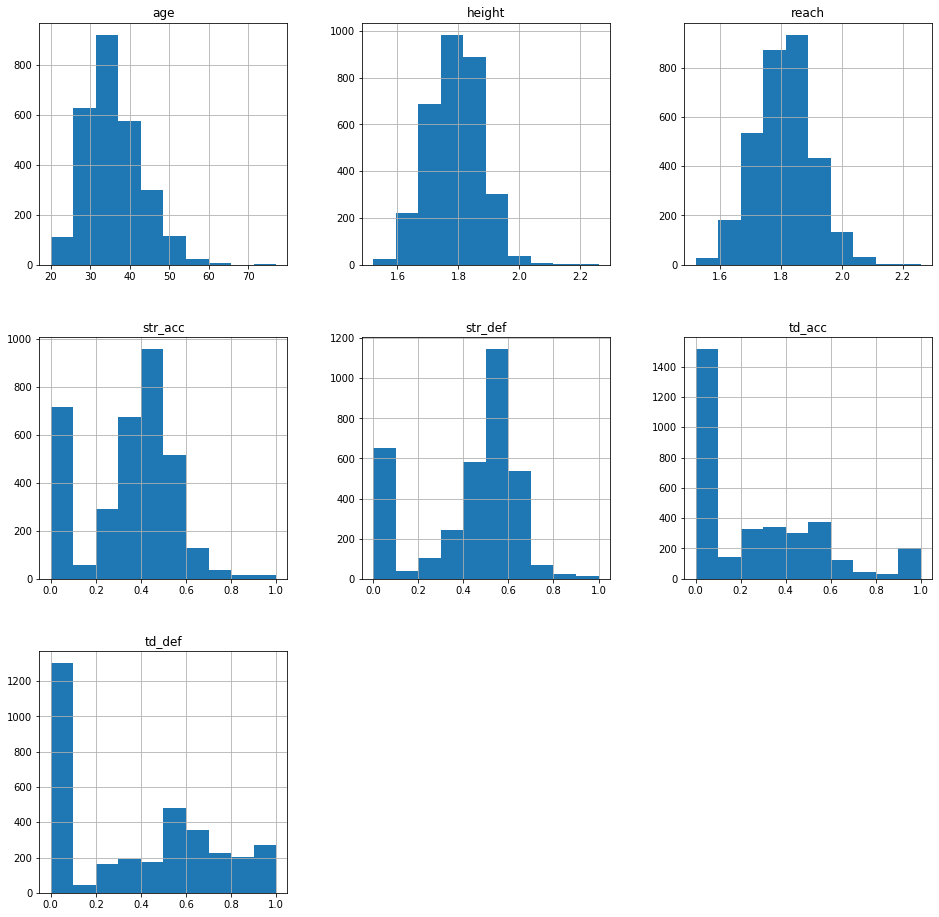

In [23]:
fighter_df.hist(bins=10, figsize=(16,16))
plt.show()

In [24]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age
0,Hunter Azure,1.73,135,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0
1,Michael Byrnes,1.80,155,1.80,,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0
2,Gleidson Cutis,1.75,155,1.75,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0
3,Rolando Dy,1.73,145,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0
4,Jessica Eye,1.68,125,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0


# 2. Bout Data

In [25]:
bout_df = pd.read_csv("ufc_scrape/data_fights.csv")

In [26]:
bout_df.head()

,f1_name,f2_name,f1_str,f2_str,f1_tds,f2_tds,f1_subs,f2_subs,f1_pass,f2_pass,weight_class,method,finisher,round_num,time,event_name,event_date
0,\n Anthony Smith\n,\n Alexander Gustafsson\n ...,49,72,0,1,1,0,1,1,\n Light Heavyweight,\n \n \n\n SUB\n\n,\n Rear Naked Choke\n,4,\n\n \n 2:38\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
1,\n Aleksandar Rakic\n,\n Jimi Manuwa\n,2,2,0,0,0,0,0,0,\n Light Heavyweight,\n \n \n\n KO/TKO\n\n,\n Kick\n,1,\n\n \n 0:47\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
2,\n Makwan Amirkhani\n,\n Chris Fishgold\n,9,16,1,0,1,0,2,0,\n Featherweight,\n \n \n\n SUB\n\n,\n Anaconda Choke\n,2,\n\n \n 4:25\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
3,\n Christos Giagos\n,\n Damir Hadzovic\n,47,24,6,1,0,0,3,0,\n Lightweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
4,\n Daniel Teymur\n,\n Sung Bin Jo\n,40,21,1,1,0,1,0,0,\n Featherweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"


In [27]:
bout_df.duplicated(subset=None).sum()

0

In [28]:
bout_df = bout_df.replace(['\n',','],'', regex=True)

In [29]:
bout_df = bout_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [30]:
bout_df[['minutes', 'seconds']] = bout_df['time'].str.split(':', expand=True)

In [31]:
num_columns = ['f1_str', 
               'f2_str', 
               'f1_tds', 
               'f2_tds', 
               'f1_subs', 
               'f2_subs', 
               'f1_pass', 
               'f2_pass',
               'round_num',
               'minutes',
               'seconds']

In [32]:
bout_df[num_columns] = bout_df[num_columns].apply(pd.to_numeric, errors='coerce')

In [33]:
bout_df['fight_time'] = round((5*(bout_df['round_num']-1)) + bout_df['minutes'] + (bout_df['seconds']/60), 2)

In [34]:
bout_df.drop(columns=['round_num','time','minutes','seconds'], inplace=True)

In [35]:
bout_df['event_date'] = pd.to_datetime(bout_df['event_date'], format='%B %d %Y')

In [36]:
bout_df.head()

,f1_name,f2_name,f1_str,f2_str,f1_tds,f2_tds,f1_subs,f2_subs,f1_pass,f2_pass,weight_class,method,finisher,event_name,event_date,fight_time
0,Anthony Smith,Alexander Gustafsson,49,72,0,1,1,0,1,1,Light Heavyweight,SUB,Rear Naked Choke,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,17.63
1,Aleksandar Rakic,Jimi Manuwa,2,2,0,0,0,0,0,0,Light Heavyweight,KO/TKO,Kick,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,0.78
2,Makwan Amirkhani,Chris Fishgold,9,16,1,0,1,0,2,0,Featherweight,SUB,Anaconda Choke,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,9.42
3,Christos Giagos,Damir Hadzovic,47,24,6,1,0,0,3,0,Lightweight,U-DEC,,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,15.00
4,Daniel Teymur,Sung Bin Jo,40,21,1,1,0,1,0,0,Featherweight,U-DEC,,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,15.00


In [37]:
winner_df = bout_df[['f1_name','weight_class','event_date']]
winner_df.rename(columns={'f1_name':'name'}, inplace=True)

/Users/ravimalde/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [38]:
loser_df = bout_df[['f2_name','weight_class','event_date']]
loser_df.rename(columns={'f2_name':'name'}, inplace=True)

In [39]:
stacked_df = pd.concat([winner_df, loser_df], axis=0)

In [40]:
stacked_df

,name,weight_class,event_date
0,Anthony Smith,Light Heavyweight,2019-06-01
1,Aleksandar Rakic,Light Heavyweight,2019-06-01
2,Makwan Amirkhani,Featherweight,2019-06-01
3,Christos Giagos,Lightweight,2019-06-01
4,Daniel Teymur,Featherweight,2019-06-01
...,...,...,...
5530,Aleksei Kunchenko,Welterweight,2020-03-14
5531,Enrique Barzola,Bantamweight,2020-03-14
5532,Mayra Bueno Silva,Women's Flyweight,2020-03-14
5533,Bruno Silva,Flyweight,2020-03-14


In [41]:
# bout_df.hist(bins=20, figsize=(16,16))
# plt.show()

In [42]:
bout_df.isnull().sum()

f1_name         0
f2_name         0
f1_str          0
f2_str          0
f1_tds          0
f2_tds          0
f1_subs         0
f2_subs         0
f1_pass         0
f2_pass         0
weight_class    0
method          0
finisher        0
event_name      0
event_date      0
fight_time      0
dtype: int64

In [43]:
merged_df = pd.merge(fighter_df[['name','height','weight','reach']], stacked_df, left_on='name', right_on='name')
# merged_df.drop(columns=['f1_name','f2_name'], inplace=True)

In [44]:
merged_df.sort_values(by='name', inplace=True)

In [45]:
merged_df = pd.DataFrame(merged_df.groupby('name').weight_class.apply(lambda x: x.mode()).reset_index())
merged_df.drop(columns=['level_1'], inplace=True)

In [46]:
merged_df

,name,weight_class
0,Aalon Cruz,Featherweight
1,Aaron Brink,Heavyweight
2,Aaron Phillips,Bantamweight
3,Aaron Phillips,Featherweight
4,Aaron Riley,Lightweight
...,...,...
2115,Zarah Fairn,Women's Featherweight
2116,Zelim Imadaev,Welterweight
2117,Zhang Lipeng,Lightweight
2118,Zu Anyanwu,Heavyweight


In [47]:
merged_df.rename(columns={'weight_class':'most_common_weight_class'}, inplace=True)

In [48]:
fighter_df = fighter_df.merge(merged_df[['name','most_common_weight_class']], how='left')

In [49]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age,most_common_weight_class
0,Hunter Azure,1.73,135,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0,Bantamweight
1,Michael Byrnes,1.80,155,1.80,,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0,NaN
2,Gleidson Cutis,1.75,155,1.75,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0,NaN
3,Rolando Dy,1.73,145,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0,Featherweight
4,Jessica Eye,1.68,125,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0,Women's Bantamweight


In [50]:
fighter_df_grouped = fighter_df.groupby(by='most_common_weight_class').mean().reset_index()

In [51]:
fighter_df_grouped

,most_common_weight_class,height,reach,str_acc,str_def,td_acc,td_def,age
0,Bantamweight,1.708125,1.744830,0.402330,0.553125,0.339148,0.555625,32.420455
1,Catch Weight,1.770000,1.763333,0.340000,0.523333,0.406667,0.506667,38.666667
2,Featherweight,1.747234,1.786011,0.420160,0.550638,0.328830,0.535745,32.228723
3,Flyweight,1.666667,1.692308,0.392949,0.558333,0.318077,0.569872,31.666667
4,Heavyweight,1.891343,1.921759,0.387097,0.418018,0.285346,0.411382,40.052356
5,Light Heavyweight,1.865207,1.906272,0.449824,0.505647,0.315647,0.503471,37.134969
6,Lightweight,1.769764,1.803622,0.375429,0.508779,0.312260,0.465091,35.452247
7,Middleweight,1.835176,1.870563,0.409648,0.487641,0.345317,0.471479,37.567669
8,Open Weight,1.849024,1.849390,0.058588,0.049176,0.050824,0.047647,52.586207
9,Welterweight,1.806750,1.843167,0.407167,0.519778,0.360250,0.509833,35.991429


In [52]:
fighter_df = fighter_df.replace('--','', regex=True)

In [53]:
fighter_df.replace('', np.nan, inplace=True)

In [54]:
fighter_df[['weight','slmp','ssapm','td_avg','sub_avg']] = fighter_df[['weight','slmp','ssapm','td_avg','sub_avg']].astype(float, errors='ignore')
fighter_df[['wins','losses','draws']] = fighter_df[['wins','losses','draws']].astype(int, errors='ignore')

In [55]:
# merged_df = pd.DataFrame(merged_df.groupby('name').weight_class.apply(lambda x: x.mode()).reset_index())

In [56]:
dummy_df = pd.DataFrame(fighter_df.groupby('weight')['most_common_weight_class'].apply(lambda x: x.mode()).reset_index())

In [57]:
dummy_df

,weight,level_1,most_common_weight_class
0,115.0,0,Women's Strawweight
1,125.0,0,Flyweight
2,135.0,0,Bantamweight
3,145.0,0,Featherweight
4,155.0,0,Lightweight
...,...,...,...
79,350.0,0,Open Weight
80,400.0,0,Open Weight
81,410.0,0,Open Weight
82,430.0,0,Open Weight


In [58]:
weight_class_df = pd.DataFrame(fighter_df.groupby('weight')['most_common_weight_class'].apply(lambda x: x.mode()).reset_index())

In [59]:
weight_class_df.head()

,weight,level_1,most_common_weight_class
0,115.0,0,Women's Strawweight
1,125.0,0,Flyweight
2,135.0,0,Bantamweight
3,145.0,0,Featherweight
4,155.0,0,Lightweight


In [60]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age,most_common_weight_class
0,Hunter Azure,1.73,135.0,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0,Bantamweight
1,Michael Byrnes,1.80,155.0,1.80,NaN,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0,NaN
2,Gleidson Cutis,1.75,155.0,1.75,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0,NaN
3,Rolando Dy,1.73,145.0,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0,Featherweight
4,Jessica Eye,1.68,125.0,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0,Women's Bantamweight


In [61]:
fighter_df['most_common_weight_class'].unique()

array(['Bantamweight', nan, 'Featherweight', "Women's Bantamweight",
       'Welterweight', 'Middleweight', "Women's Featherweight",
       'Heavyweight', 'Flyweight', 'Lightweight', 'Light Heavyweight',
       "Women's Strawweight", 'Open Weight', "Women's Flyweight",
       'Catch Weight'], dtype=object)

In [62]:
fighter_df['most_common_weight_class'].isnull().sum()

1402

In [63]:
for i, row in fighter_df.iterrows():
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] < 115):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Strawweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 115) and (row['weight'] <= 125):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Flyweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 125) and (row['weight'] <= 135):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Bantamweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 135) and (row['weight'] <= 145):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Featherweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 145) and (row['weight'] <= 155):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Lightweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 155) and (row['weight'] <= 170):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Welterweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 170) and (row['weight'] <= 185):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Middleweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 185) and (row['weight'] <= 205):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Middleweight'
    if pd.isnull(row['most_common_weight_class']) and (row['weight'] > 205):
        fighter_df.loc[i, 'most_common_weight_class'] = 'Heavyweight'
    else:
        pass

In [64]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age,most_common_weight_class
0,Hunter Azure,1.73,135.0,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0,Bantamweight
1,Michael Byrnes,1.80,155.0,1.80,NaN,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0,Lightweight
2,Gleidson Cutis,1.75,155.0,1.75,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0,Lightweight
3,Rolando Dy,1.73,145.0,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0,Featherweight
4,Jessica Eye,1.68,125.0,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0,Women's Bantamweight


In [65]:
fighter_df['height'] = fighter_df.groupby('most_common_weight_class')['height'].apply(lambda x: x.fillna(x.mean()))

In [66]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age,most_common_weight_class
0,Hunter Azure,1.73,135.0,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0,Bantamweight
1,Michael Byrnes,1.80,155.0,1.80,NaN,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0,Lightweight
2,Gleidson Cutis,1.75,155.0,1.75,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0,Lightweight
3,Rolando Dy,1.73,145.0,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0,Featherweight
4,Jessica Eye,1.68,125.0,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0,Women's Bantamweight


In [67]:
fighter_df.isnull().sum()

name                          0
height                       80
weight                       75
reach                       257
stance                      847
dob                         750
slmp                          0
str_acc                       0
ssapm                         0
str_def                       0
td_avg                        0
td_acc                        0
td_def                        0
sub_avg                       0
wins                          0
losses                        0
draws                         0
age                         750
most_common_weight_class     80
dtype: int64

In [68]:
fighter_df.groupby('most_common_weight_class').mean()

,height,weight,reach,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age
most_common_weight_class,,,,,,,,,,,,,,,
Bantamweight,1.706406,135.231023,1.732456,2.538350,0.352640,3.131452,0.488020,1.199604,0.267855,0.451617,0.604290,11.264026,4.386139,0.260726,32.848249
Catch Weight,1.770000,175.000000,1.763333,1.826667,0.340000,3.670000,0.523333,1.533333,0.406667,0.506667,0.400000,19.666667,6.333333,0.666667,38.666667
Featherweight,1.736667,144.569892,1.761017,2.469032,0.352608,2.897339,0.461156,1.302769,0.256022,0.423199,0.639785,12.306452,4.876344,0.311828,33.376623
Flyweight,1.668226,126.102362,1.685726,2.442992,0.356063,2.931890,0.472283,1.290866,0.257244,0.440709,0.601575,11.543307,4.181102,0.157480,31.373832
Heavyweight,1.884707,246.738155,1.902977,1.986617,0.341070,3.195672,0.380473,1.110025,0.239801,0.315771,0.634080,10.825871,5.616915,0.236318,40.877419
Light Heavyweight,1.865207,203.535294,1.906272,2.901706,0.449824,3.444118,0.505647,1.547412,0.315647,0.503471,0.827059,14.394118,5.617647,0.188235,37.134969
Lightweight,1.765397,156.306122,1.790296,2.189071,0.335236,2.813429,0.445845,1.313429,0.271926,0.385389,0.628041,12.349662,5.354730,0.322635,35.931106
Middleweight,1.829766,189.914373,1.850368,1.905703,0.335627,2.888869,0.387125,1.209083,0.247859,0.323823,0.705657,11.348624,5.735474,0.340979,37.818763
Open Weight,1.849024,236.634146,1.849390,0.186353,0.058588,0.322706,0.049176,0.173412,0.050824,0.047647,0.135294,6.011765,5.070588,0.376471,52.586207


In [69]:
pd.isnull(np.nan)

True